In [69]:
from sklearn.utils import class_weight
import numpy as np
import pandas as pd
import config
import torch
df = pd.read_csv(config.TRAIN_CSV, usecols=['label'])

class_weights = df['label'].value_counts(normalize=True)
print(class_weights)
class_weights = class_weights.to_numpy()
class_weights[0] = 13036 / (2*12180)
class_weights[1] = 13036 / (2*856)
class_weights = torch.tensor(class_weights,dtype=torch.float)
print(class_weights)
classs = torch.FloatTensor([0.5351, 7.6145])
classs

he “balanced” heuristic is inspired by Logistic Regression in Rare Events Data, King, Zen, 2001.

0    0.934336
1    0.065664
Name: label, dtype: float64
tensor([0.5351, 7.6145])


tensor([0.5351, 7.6145])

In [5]:
from torchvision.models import resnet18, ResNet18_Weights

weights = ResNet18_Weights.IMAGENET1K_V1
preprocess_transform = weights.transforms()

preprocess_transform

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

# Train using sklearn class weights
0.5351, 7.6145

In [1]:
# Train model
from model import NN
from customDataModuleoriginal import CustomDataModule
import config
import pytorch_lightning as pl
from lightning.pytorch.loggers import TensorBoardLogger
from pytorch_lightning.loggers import CSVLogger
from lightning.pytorch import seed_everything
from pytorch_lightning.callbacks import ModelCheckpoint
import torch
import torchvision.models as models
import torch.nn as nn

seed_everything(
    42, workers=True
)  # By setting workers=True in seed_everything(), Lightning derives unique seeds across all dataloader workers and processes for torch, numpy and stdlib random number generators. When turned on, it ensures that e.g. data augmentations are not repeated across workers.


callbacks = [ModelCheckpoint(
    save_top_k=1, mode='min', monitor="val_loss")]  # save top 1 model 


if __name__ == "__main__":
    
    pytorch_model = models.resnet18(weights='ResNet18_Weights.DEFAULT')
    
    logger = TensorBoardLogger("tb_logs", name="resnet_sklearnclassweights") # tb_logs is the folder, name is the name of the experiment/model
    logger2 = CSVLogger(save_dir="logs/", name="resnet_sklearnclassweights")
    
    model = NN(
        model=pytorch_model,
        input_shape=config.INPUT_SHAPE,
        num_classes=config.NUM_CLASSES,
        learning_rate=config.LEARNING_RATE,
    )  # .to(device)
    dm = CustomDataModule(
        data_dir=config.DATA_DIR,
        train_csv=config.TRAIN_CSV_1,
        val_csv=config.VAL_CSV_1,
        test_csv=config.TEST_CSV,
        batch_size=config.BATCH_SIZE,
        num_workers=config.NUM_WORKERS,
        mean=config.MEAN,
        std=config.STD
    )
    
    trainer = pl.Trainer(
        logger=[logger2, logger],
        accelerator=config.ACCELERATOR,
        devices=config.DEVICES,
        min_epochs=config.MIN_EPOCHS,
        max_epochs=config.MAX_EPOCHS,
        deterministic=config.DETERMINISTIC,
        callbacks=callbacks
    )
      # deterministic ensures random seed reproducibility

    trainer.fit(model, dm)  # it will automatically know which dataloader to use
    
# A general place to start is to set num_workers equal to the number of CPU cores on that machine. You can get the number of CPU cores in python using os.cpu_count(), but note that depending on your batch size, you may overflow RAM memory.


Global seed set to 42
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: logs/resnet_sklearnclassweights
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params
-----------------------------------------------
0 | model     | ResNet           | 11.2 M
1 | loss_fn   | CrossEntropyLoss | 0     
2 | train_acc | BinaryAccuracy   | 0     
3 | val_acc   | BinaryAccuracy   | 0     
4 | test_acc  | BinaryAccuracy   | 0     
-----------------------------------------------
1.0 K     Trainable params
11.2 M    Non-trainable params
11.2 M    Total params
44.710    Total estimated model params size (MB)


Epoch 0: 100%|██████████| 321/321 [01:48<00:00,  2.95it/s, v_num=0]        
Validation: 0it [00:00, ?it/s]
Epoch 1: 100%|██████████| 321/321 [01:50<00:00,  2.90it/s, v_num=0, train_loss=0.679, train_accuracy=0.654]
Validation: 0it [00:00, ?it/s]
Epoch 2: 100%|██████████| 321/321 [01:45<00:00,  3.03it/s, v_num=0, train_loss=0.635, train_accuracy=0.689]
Validation: 0it [00:00, ?it/s]
Epoch 3: 100%|██████████| 321/321 [01:45<00:00,  3.03it/s, v_num=0, train_loss=0.607, train_accuracy=0.706]
Validation: 0it [00:00, ?it/s]
Epoch 4: 100%|██████████| 321/321 [01:44<00:00,  3.07it/s, v_num=0, train_loss=0.599, train_accuracy=0.724]
Validation: 0it [00:00, ?it/s]
Epoch 5: 100%|██████████| 321/321 [01:51<00:00,  2.88it/s, v_num=0, train_loss=0.583, train_accuracy=0.723]
Validation: 0it [00:00, ?it/s]
Epoch 6: 100%|██████████| 321/321 [01:50<00:00,  2.92it/s, v_num=0, train_loss=0.595, train_accuracy=0.711]
Validation: 0it [00:00, ?it/s]
Epoch 7: 100%|██████████| 321/321 [01:44<00:00,  3.08it/s, 

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 321/321 [02:22<00:00,  2.25it/s, v_num=0, train_loss=0.558, train_accuracy=0.742]


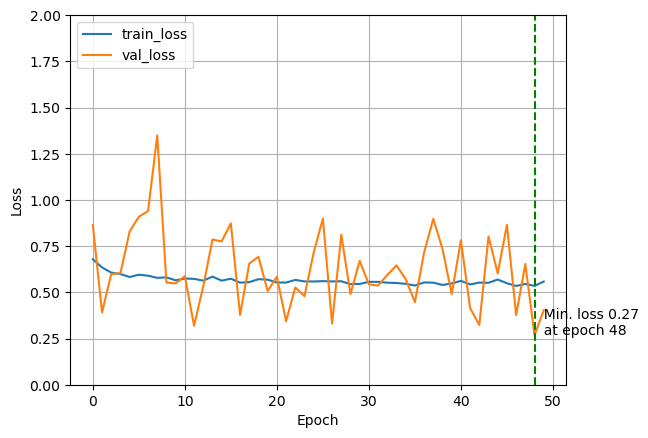

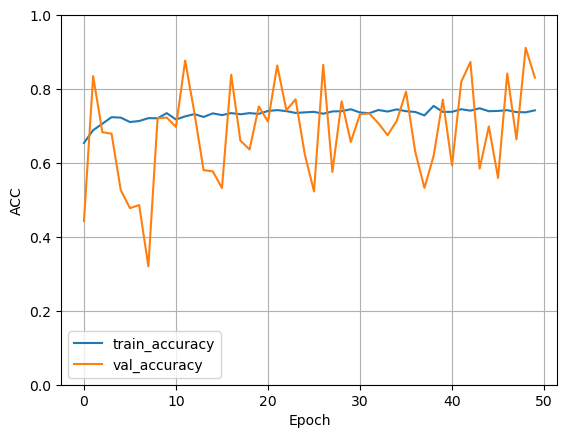

In [2]:
from plot_loss_and_acc import *
plot_loss_and_acc(trainer.logger.log_dir, loss_ylim=(0.0, 2.0), acc_ylim=(0.0, 1.0))

In [3]:
path = trainer.checkpoint_callback.best_model_path
print(path)

logs/resnet_sklearnclassweights\version_0\checkpoints\epoch=48-step=15729.ckpt


In [4]:
trainer.validate(model=model, datamodule=dm, ckpt_path=path)

Restoring states from the checkpoint path at logs/resnet_sklearnclassweights\version_0\checkpoints\epoch=48-step=15729.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at logs/resnet_sklearnclassweights\version_0\checkpoints\epoch=48-step=15729.ckpt


Validation DataLoader 0: 100%|██████████| 88/88 [00:25<00:00,  3.42it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       val_accuracy        │    0.9115329384803772     │
│         val_loss          │    0.2684180438518524     │
└───────────────────────────┴───────────────────────────┘

[{'val_loss': 0.2684180438518524, 'val_accuracy': 0.9115329384803772}]

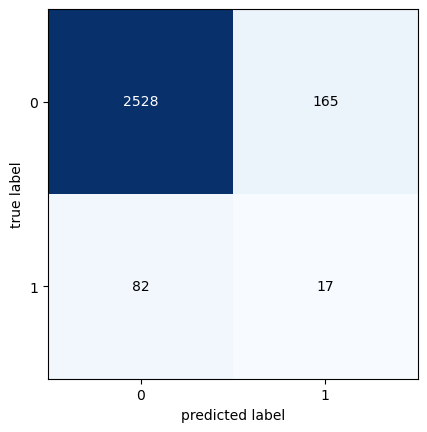

true negatives (TN): 2528
false positives (FP): 165
false negatives (FN): 82
true positives (TP): 17
accuracy: 0.9115329512893983
precision: 0.09340659340659341
recall: 0.1717171717171717
f1score: 0.12099644128113879
Parcel level accuracy: 0.9495 (94.95%)


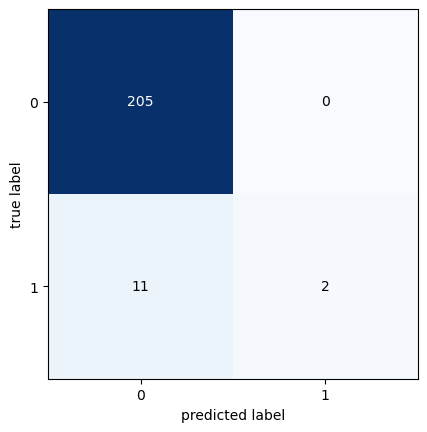

true negatives (TN): 205
false positives (FP): 0
false negatives (FN): 11
true positives (TP): 2
accuracy: 0.9495412844036697
precision: 1.0
recall: 0.15384615384615385
f1score: 0.2666666666666667


In [5]:
# Obtain validation dataset predictions
lightning_model = NN.load_from_checkpoint(
    path, model=pytorch_model)
lightning_model.eval();   

val_dataloader = dm.val_dataloader()

all_true_labels = []
all_predicted_labels = []
for batch in val_dataloader:
    features, labels = batch
    
    with torch.no_grad():
        logits = lightning_model(features)

    predicted_labels = torch.argmax(logits, dim=1)
    all_predicted_labels.append(predicted_labels)
    all_true_labels.append(labels)
    
all_predicted_labels1 = torch.cat(all_predicted_labels)
all_true_labels1 = torch.cat(all_true_labels)

from plot_loss_and_acc import *
confusion_matrix(all_predicted_labels1, all_true_labels1)
parcel_level_new(r"C:/Users/kaspe/OneDrive - Aarhus Universitet/Skrivebord/BI/4. semester/Data/LBST/val_set_1.csv", all_predicted_labels1)

In [6]:
print('Label predictions: ', '\n', all_predicted_labels1, '\n', 'Label truth: ', '\n', all_true_labels1)


Label predictions:  
 tensor([0, 0, 0,  ..., 0, 0, 0]) 
 Label truth:  
 tensor([0, 0, 0,  ..., 1, 1, 1])


# Train using sklearn/2 class weights
From
0.5351, 7.6145
To
0.5351, 3.8073

In [7]:
# Train model
from modelNewCW import NN
from customDataModuleoriginal import CustomDataModule
import config
import pytorch_lightning as pl
from lightning.pytorch.loggers import TensorBoardLogger
from pytorch_lightning.loggers import CSVLogger
from lightning.pytorch import seed_everything
from pytorch_lightning.callbacks import ModelCheckpoint
import torch
import torchvision.models as models
import torch.nn as nn

seed_everything(
    42, workers=True
)  # By setting workers=True in seed_everything(), Lightning derives unique seeds across all dataloader workers and processes for torch, numpy and stdlib random number generators. When turned on, it ensures that e.g. data augmentations are not repeated across workers.


callbacks = [ModelCheckpoint(
    save_top_k=1, mode='min', monitor="val_loss")]  # save top 1 model 


if __name__ == "__main__":
    
    pytorch_model = models.resnet18(weights='ResNet18_Weights.DEFAULT')
    
    logger = TensorBoardLogger("tb_logs2", name="resnet_sklearnclassweights_2") # tb_logs is the folder, name is the name of the experiment/model
    logger2 = CSVLogger(save_dir="logs2/", name="resnet_sklearnclassweights_2")
    
    model = NN(
        model=pytorch_model,
        input_shape=config.INPUT_SHAPE,
        num_classes=config.NUM_CLASSES,
        learning_rate=config.LEARNING_RATE,
    )  # .to(device)
    dm = CustomDataModule(
        data_dir=config.DATA_DIR,
        train_csv=config.TRAIN_CSV_1,
        val_csv=config.VAL_CSV_1,
        test_csv=config.TEST_CSV,
        batch_size=config.BATCH_SIZE,
        num_workers=config.NUM_WORKERS,
        mean=config.MEAN,
        std=config.STD
    )
    
    trainer = pl.Trainer(
        logger=[logger2, logger],
        accelerator=config.ACCELERATOR,
        devices=config.DEVICES,
        min_epochs=config.MIN_EPOCHS,
        max_epochs=config.MAX_EPOCHS,
        deterministic=config.DETERMINISTIC,
        callbacks=callbacks
    )
      # deterministic ensures random seed reproducibility

    trainer.fit(model, dm)  # it will automatically know which dataloader to use
    
# A general place to start is to set num_workers equal to the number of CPU cores on that machine. You can get the number of CPU cores in python using os.cpu_count(), but note that depending on your batch size, you may overflow RAM memory.


Global seed set to 42
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: logs2/resnet_sklearnclassweights_2
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params
-----------------------------------------------
0 | model     | ResNet           | 11.2 M
1 | loss_fn   | CrossEntropyLoss | 0     
2 | train_acc | BinaryAccuracy   | 0     
3 | val_acc   | BinaryAccuracy   | 0     
4 | test_acc  | BinaryAccuracy   | 0     
-----------------------------------------------
1.0 K     Trainable params
11.2 M    Non-trainable params
11.2 M    Total params
44.710    Total estimated model params size (MB)


Epoch 0: 100%|██████████| 321/321 [01:43<00:00,  3.09it/s, v_num=0]        
Validation: 0it [00:00, ?it/s]
Epoch 1: 100%|██████████| 321/321 [01:43<00:00,  3.09it/s, v_num=0, train_loss=0.622, train_accuracy=0.821]
Validation: 0it [00:00, ?it/s]
Epoch 2: 100%|██████████| 321/321 [01:43<00:00,  3.09it/s, v_num=0, train_loss=0.577, train_accuracy=0.825]
Validation: 0it [00:00, ?it/s]
Epoch 3: 100%|██████████| 321/321 [01:44<00:00,  3.09it/s, v_num=0, train_loss=0.557, train_accuracy=0.837]
Validation: 0it [00:00, ?it/s]
Epoch 4: 100%|██████████| 321/321 [01:44<00:00,  3.08it/s, v_num=0, train_loss=0.546, train_accuracy=0.838]
Validation: 0it [00:00, ?it/s]
Epoch 5: 100%|██████████| 321/321 [01:43<00:00,  3.09it/s, v_num=0, train_loss=0.536, train_accuracy=0.841]
Validation: 0it [00:00, ?it/s]
Epoch 6: 100%|██████████| 321/321 [01:45<00:00,  3.05it/s, v_num=0, train_loss=0.545, train_accuracy=0.835]
Validation: 0it [00:00, ?it/s]
Epoch 7: 100%|██████████| 321/321 [01:43<00:00,  3.09it/s, 

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 321/321 [02:21<00:00,  2.27it/s, v_num=0, train_loss=0.515, train_accuracy=0.836]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

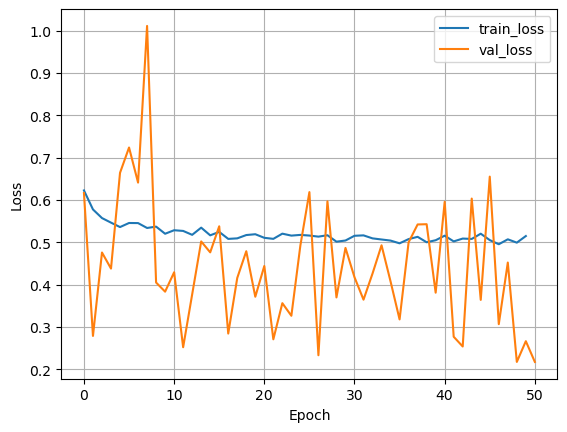

In [13]:
from plot_loss_and_acc import *
plot_loss_and_acc(trainer.logger.log_dir, loss_ylim=(0.0, 2.0), acc_ylim=(0.0, 1.0))

In [14]:
path = trainer.checkpoint_callback.best_model_path
print(path)

logs2/resnet_sklearnclassweights_2\version_0\checkpoints\epoch=48-step=15729.ckpt


In [15]:
trainer.validate(model=model, datamodule=dm, ckpt_path=path)

Restoring states from the checkpoint path at logs2/resnet_sklearnclassweights_2\version_0\checkpoints\epoch=48-step=15729.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at logs2/resnet_sklearnclassweights_2\version_0\checkpoints\epoch=48-step=15729.ckpt


Validation DataLoader 0: 100%|██████████| 88/88 [00:25<00:00,  3.39it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       val_accuracy        │    0.9419770836830139     │
│         val_loss          │    0.21715134382247925    │
└───────────────────────────┴───────────────────────────┘

[{'val_loss': 0.21715134382247925, 'val_accuracy': 0.9419770836830139}]

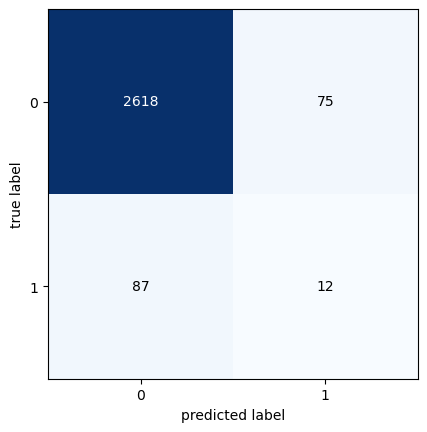

true negatives (TN): 2618
false positives (FP): 75
false negatives (FN): 87
true positives (TP): 12
accuracy: 0.9419770773638968
precision: 0.13793103448275862
recall: 0.12121212121212122
f1score: 0.12903225806451615
Parcel level accuracy: 0.9404 (94.04%)


C:\Users\kaspe\LBST\initial_models\class weight\plot_loss_and_acc.py:58: RuntimeWarning: invalid value encountered in divide
  precision = tp / (tp + fp)


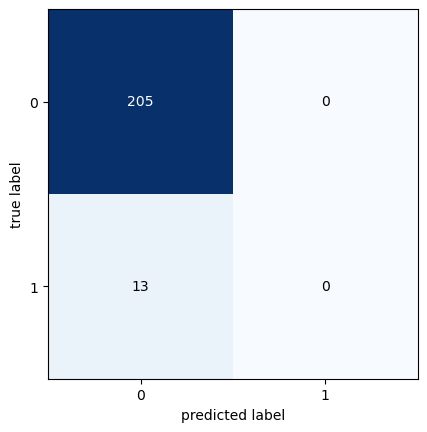

true negatives (TN): 205
false positives (FP): 0
false negatives (FN): 13
true positives (TP): 0
accuracy: 0.9403669724770642
precision: nan
recall: 0.0
f1score: nan


In [16]:
# Obtain validation dataset predictions
lightning_model = NN.load_from_checkpoint(
    path, model=pytorch_model)
lightning_model.eval();   

val_dataloader = dm.val_dataloader()

all_true_labels = []
all_predicted_labels = []
for batch in val_dataloader:
    features, labels = batch
    
    with torch.no_grad():
        logits = lightning_model(features)

    predicted_labels = torch.argmax(logits, dim=1)
    all_predicted_labels.append(predicted_labels)
    all_true_labels.append(labels)
    
all_predicted_labels1 = torch.cat(all_predicted_labels)
all_true_labels1 = torch.cat(all_true_labels)

from plot_loss_and_acc import *
confusion_matrix(all_predicted_labels1, all_true_labels1)
parcel_level_new(r"C:/Users/kaspe/OneDrive - Aarhus Universitet/Skrivebord/BI/4. semester/Data/LBST/val_set_1.csv", all_predicted_labels1)

In [17]:
print('Label predictions: ', '\n', all_predicted_labels1, '\n', 'Label truth: ', '\n', all_true_labels1)


Label predictions:  
 tensor([0, 0, 0,  ..., 0, 0, 0]) 
 Label truth:  
 tensor([0, 0, 0,  ..., 1, 1, 1])


# Train using class weights + AutoAugment

I use the model with initial sklearn class weights, as it had somewhat similar loss and accuracy but better recall.

In [18]:
# Train model
from model import NN
from customDataModuleAutoAugment import CustomDataModule
import config
import pytorch_lightning as pl
from lightning.pytorch.loggers import TensorBoardLogger
from pytorch_lightning.loggers import CSVLogger
from lightning.pytorch import seed_everything
from pytorch_lightning.callbacks import ModelCheckpoint
import torch
import torchvision.models as models
import torch.nn as nn

seed_everything(
    42, workers=True
)  # By setting workers=True in seed_everything(), Lightning derives unique seeds across all dataloader workers and processes for torch, numpy and stdlib random number generators. When turned on, it ensures that e.g. data augmentations are not repeated across workers.


callbacks = [ModelCheckpoint(
    save_top_k=1, mode='min', monitor="val_loss")]  # save top 1 model 


if __name__ == "__main__":
    
    pytorch_model = models.resnet18(weights='ResNet18_Weights.DEFAULT')
    
    logger = TensorBoardLogger("tb_logs_autoaugment_classweights", name="resnet_autoaugment_classweights") # tb_logs is the folder, name is the name of the experiment/model
    logger2 = CSVLogger(save_dir="logsautoaugmentclassweights/", name="resnet_autoaugment_classweights")
    
    model = NN(
        model=pytorch_model,
        input_shape=config.INPUT_SHAPE,
        num_classes=config.NUM_CLASSES,
        learning_rate=config.LEARNING_RATE,
    )  # .to(device)
    dm = CustomDataModule(
        data_dir=config.DATA_DIR,
        train_csv=config.TRAIN_CSV_1,
        val_csv=config.VAL_CSV_1,
        test_csv=config.TEST_CSV,
        batch_size=config.BATCH_SIZE,
        num_workers=config.NUM_WORKERS,
        mean=config.MEAN,
        std=config.STD
    )
    
    trainer = pl.Trainer(
        logger=[logger2, logger],
        accelerator=config.ACCELERATOR,
        devices=config.DEVICES,
        min_epochs=config.MIN_EPOCHS,
        max_epochs=config.MAX_EPOCHS,
        deterministic=config.DETERMINISTIC,
        callbacks=callbacks
    )
      # deterministic ensures random seed reproducibility

    trainer.fit(model, dm)  # it will automatically know which dataloader to use
    
# A general place to start is to set num_workers equal to the number of CPU cores on that machine. You can get the number of CPU cores in python using os.cpu_count(), but note that depending on your batch size, you may overflow RAM memory.


Global seed set to 42
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: logsautoaugmentclassweights/resnet_autoaugment_classweights
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params
-----------------------------------------------
0 | model     | ResNet           | 11.2 M
1 | loss_fn   | CrossEntropyLoss | 0     
2 | train_acc | BinaryAccuracy   | 0     
3 | val_acc   | BinaryAccuracy   | 0     
4 | test_acc  | BinaryAccuracy   | 0     
-----------------------------------------------
1.0 K     Trainable params
11.2 M    Non-trainable params
11.2 M    Total params
44.710    Total estimated model params size (MB)


Epoch 0: 100%|██████████| 321/321 [01:48<00:00,  2.95it/s, v_num=0]        
Validation: 0it [00:00, ?it/s]
Epoch 1: 100%|██████████| 321/321 [01:47<00:00,  2.98it/s, v_num=0, train_loss=0.700, train_accuracy=0.623]
Validation: 0it [00:00, ?it/s]
Epoch 2: 100%|██████████| 321/321 [01:51<00:00,  2.89it/s, v_num=0, train_loss=0.671, train_accuracy=0.672]
Validation: 0it [00:00, ?it/s]
Epoch 3: 100%|██████████| 321/321 [01:53<00:00,  2.84it/s, v_num=0, train_loss=0.655, train_accuracy=0.672]
Validation: 0it [00:00, ?it/s]
Epoch 4: 100%|██████████| 321/321 [01:48<00:00,  2.97it/s, v_num=0, train_loss=0.651, train_accuracy=0.693]
Validation: 0it [00:00, ?it/s]
Epoch 5: 100%|██████████| 321/321 [01:48<00:00,  2.96it/s, v_num=0, train_loss=0.640, train_accuracy=0.677]
Validation: 0it [00:00, ?it/s]
Epoch 6: 100%|██████████| 321/321 [01:48<00:00,  2.95it/s, v_num=0, train_loss=0.643, train_accuracy=0.688]
Validation: 0it [00:00, ?it/s]
Epoch 7: 100%|██████████| 321/321 [01:49<00:00,  2.93it/s, 

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 321/321 [02:26<00:00,  2.19it/s, v_num=0, train_loss=0.637, train_accuracy=0.686]


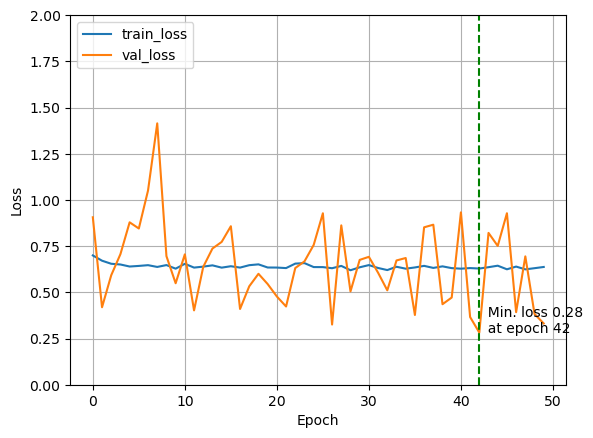

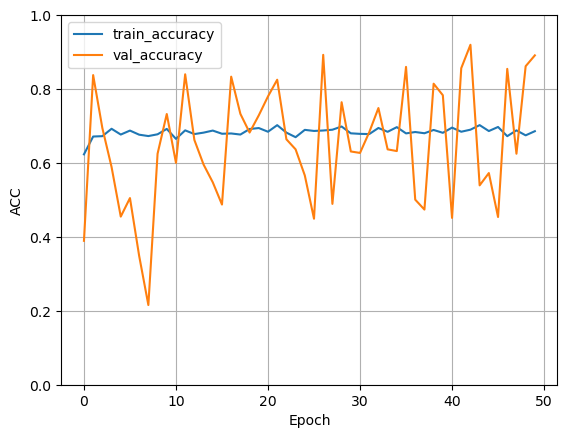

In [19]:
from plot_loss_and_acc import *
plot_loss_and_acc(trainer.logger.log_dir, loss_ylim=(0.0, 2.0), acc_ylim=(0.0, 1.0))

In [20]:
path = trainer.checkpoint_callback.best_model_path
print(path)

logsautoaugmentclassweights/resnet_autoaugment_classweights\version_0\checkpoints\epoch=42-step=13803.ckpt


In [21]:
trainer.validate(model=model, datamodule=dm, ckpt_path=path)

Restoring states from the checkpoint path at logsautoaugmentclassweights/resnet_autoaugment_classweights\version_0\checkpoints\epoch=42-step=13803.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at logsautoaugmentclassweights/resnet_autoaugment_classweights\version_0\checkpoints\epoch=42-step=13803.ckpt


Validation DataLoader 0: 100%|██████████| 88/88 [00:25<00:00,  3.43it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       val_accuracy        │    0.9122492671012878     │
│         val_loss          │    0.2883302867412567     │
└───────────────────────────┴───────────────────────────┘

[{'val_loss': 0.2883302867412567, 'val_accuracy': 0.9122492671012878}]

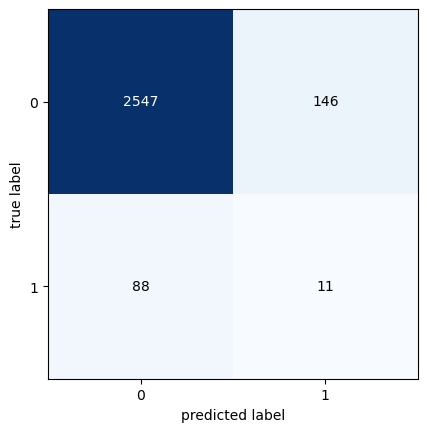

true negatives (TN): 2547
false positives (FP): 146
false negatives (FN): 88
true positives (TP): 11
accuracy: 0.916189111747851
precision: 0.07006369426751592
recall: 0.1111111111111111
f1score: 0.08593750000000001
Parcel level accuracy: 0.9495 (94.95%)


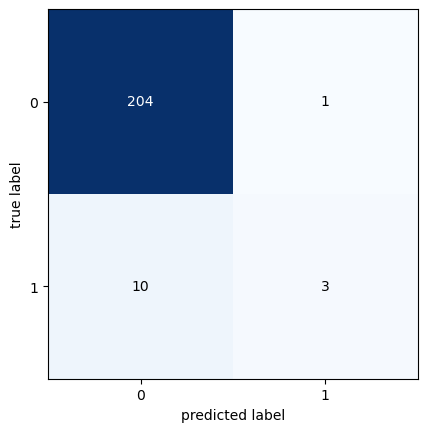

true negatives (TN): 204
false positives (FP): 1
false negatives (FN): 10
true positives (TP): 3
accuracy: 0.9495412844036697
precision: 0.75
recall: 0.23076923076923078
f1score: 0.3529411764705882


In [22]:
# Obtain validation dataset predictions
lightning_model = NN.load_from_checkpoint(
    path, model=pytorch_model)
lightning_model.eval();   

val_dataloader = dm.val_dataloader()

all_true_labels = []
all_predicted_labels = []
for batch in val_dataloader:
    features, labels = batch
    
    with torch.no_grad():
        logits = lightning_model(features)

    predicted_labels = torch.argmax(logits, dim=1)
    all_predicted_labels.append(predicted_labels)
    all_true_labels.append(labels)
    
all_predicted_labels1 = torch.cat(all_predicted_labels)
all_true_labels1 = torch.cat(all_true_labels)

from plot_loss_and_acc import *
confusion_matrix(all_predicted_labels1, all_true_labels1)
parcel_level_new(r"C:/Users/kaspe/OneDrive - Aarhus Universitet/Skrivebord/BI/4. semester/Data/LBST/val_set_1.csv", all_predicted_labels1)

In [23]:
print('Label predictions: ', '\n', all_predicted_labels1, '\n', 'Label truth: ', '\n', all_true_labels1)


Label predictions:  
 tensor([0, 0, 0,  ..., 0, 0, 0]) 
 Label truth:  
 tensor([0, 0, 0,  ..., 1, 1, 1])
